In [3]:
import sys
import mglearn as mglearn
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))


Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))


Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


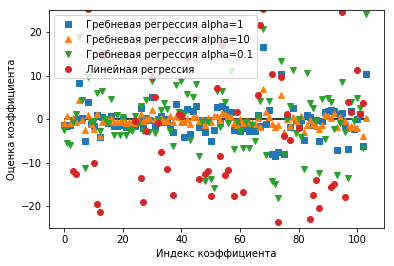

In [11]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

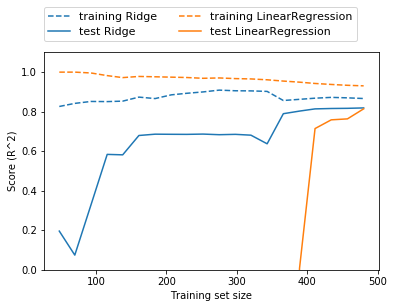

In [12]:
mglearn.plots.plot_ridge_n_samples()


In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


In [19]:
lasso001 = Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))


Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Признак 0")
 ax.set_ylabel("Признак 1")
axes[0].legend()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))


Правильность на обучающем наборе: 0.953
Правильность на тестовом наборе: 0.958


In [22]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))


Правильность на обучающем наборе: 0.977
Правильность на тестовом наборе: 0.965


In [23]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


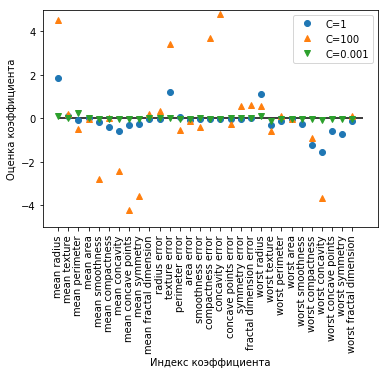

In [24]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92
Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96


Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


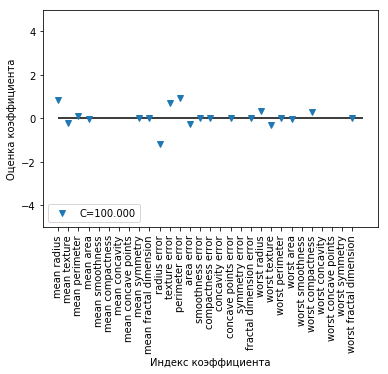

In [25]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
 print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend(loc=3)


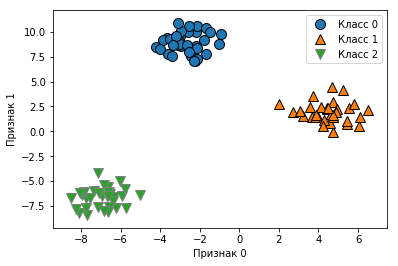

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [28]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)


Форма коэффициента:  (3, 2)
Форма константы:  (3,)


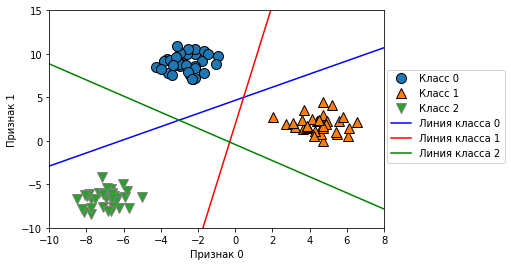

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))


Text(0,0.5,'Признак 1')

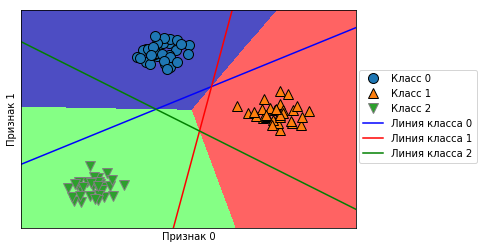

In [30]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1") 